In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from PIL import *
pytesseract.pytesseract.tesseract_cmd = 'E:\\Tesseract-OCR\\tesseract.exe'



In [2]:
#loading trained dataset file 
num_cascade = cv2.CascadeClassifier("indian_license_plate.xml")
#loading the video 
cap = cv2.VideoCapture("10.15.8.72_31_20200618093853482.mp4")


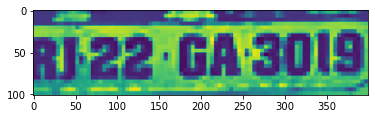

EEA22GA309


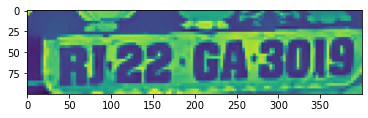

TR22GA3019
['EEA22GA309', 'TR22GA3019']


In [3]:
letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
]
#this array will contain the lisence plate numbers from each frame 
npr=[]
while(True):
    #reading each frame 
    ret, frame = cap.read()
    frame = imutils.resize(frame,width=1400)
    #grayscale conversion of the frame
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #smooting the image for better results
    gray = cv2.bilateralFilter(gray,11,17,17)
    
    #taking the coordinates of the number plate in the frame using XML file
    num=num_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in num:
        if y>1:
            #making the rectangle using the coordinates
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
            #cropping the the detected lisence plate from the frame
            cropped_img = gray[y:y+h,x:x+w]
            #resizing the number plate 
            cropped_img = imutils.resize(cropped_img, width=400)
            
            
            #running the OCR on the image to read the characters 
            text = pytesseract.image_to_string(cropped_img, lang='eng')
            #only select the plate which have characters more than 10
            if len(text)>=10:
                t=''
                #it will only select if the characters are in the letters array 
                for i in text:
                    if i in letters:
                        t=t+i
                #if the length of the caracters detected is equal to 10 it will append in the npr array
                if len(t)==10:
                    plt.imshow(cropped_img)
                    plt.show()
                    print(t)
                    npr.append(t)                
            break 
    cv2.imshow('frame',frame)
    #we can quit the video by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
print(npr)
cap.release()
cv2.destroyAllWindows()

In [4]:
## Accuracy optimization 
state=['RJ','AP','AR','AS','BR','CG','GA','GJ','HR','HP','JH','KA','KL','MP','MH','MN','ML','MZ','NL','OD','PB','SK','TN','TS','TR',
    'UP','UK','WB','AN','CH','DD','DL','JK','LA','LD','PY']
alphabets=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
numbers=['0','1','2','3','4','5','6','7','8','9']

temp=[]
#it will eleiminate the number plates which do not have state code as thir first two elements
for i in npr:
    x=i[:2]
    if x in state:
        temp.append(i) 
print(temp)
pemp=[]

#it will eleiminate the number plates whose middle elements are not aplhabets and last 4 characters are not numbers
for l in temp:
    x=l[4:5]
    y=l[5:6]
    z1=l[6:7]
    z2=l[7:8]
    z3=l[8:9]
    z4=l[9:10]

    if x in alphabets and y in alphabets and z1 in numbers and z2 in numbers and z3 in numbers and z4 in numbers:
        pemp.append(l) 
print(pemp)
del temp 

['TR22GA3019', 'RJ22GA3018', 'RJ22GA3018', 'RJ22GA3019', 'RJ22GA3018', 'RJ22GA3019', 'RJ22GA301S']
['TR22GA3019', 'RJ22GA3018', 'RJ22GA3018', 'RJ22GA3019', 'RJ22GA3018', 'RJ22GA3019']


In [5]:
npr=pemp
del pemp
npr

['TR22GA3019',
 'RJ22GA3018',
 'RJ22GA3018',
 'RJ22GA3019',
 'RJ22GA3018',
 'RJ22GA3019']

In [6]:
''' 
this algoritm will make the result accuate by selecting the each caracter from  the array elemnt and taking the maximum 
frequent value and displaying it 
'''
final=''
for i in range(0,10):
    temp=[]
    for j in range(0,len(npr)):
        temp.append(npr[j][i])
    x=max(set(temp), key = temp.count) 
    final=final+x
print(final)


RJ22GA3019
